In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
train['Age'].fillna(train['Age'].mean(),inplace=True)
train['Age']= train['Age'].astype(int)
train['Age'].dtype

dtype('int64')

In [5]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Brocklebank, Mr. William Alfred",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [6]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].value_counts().idxmax())

In [7]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [8]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
test['Fare'] = test['Fare'].fillna(test['Fare'].value_counts().idxmax())
test['Age'].fillna(test['Age'].mean(),inplace=True)
test['Age']= test['Age'].astype(int)

Columns with numeric values

In [10]:
num_col = [col for col in train.select_dtypes(include=np.number)]
num_col

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

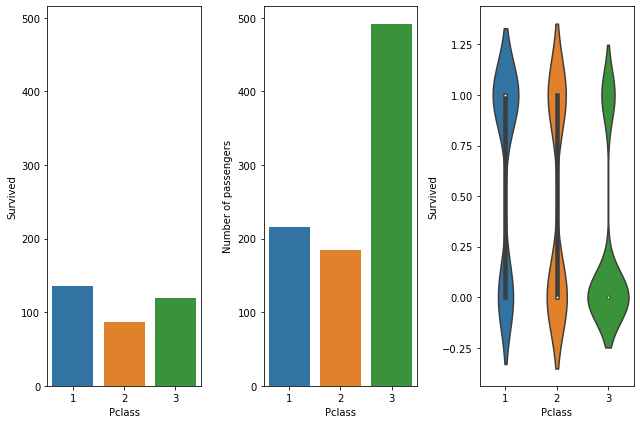

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
grafico = train.groupby('Pclass').agg({'Survived':'sum'})
plt.figure(figsize=(9,6))
ax1 = plt.subplot(131)
sns.barplot(x=grafico.index,y=grafico['Survived']);
plt.subplot(133)
sns.violinplot('Pclass', 'Survived', data=train);
ax2 = plt.subplot(132, sharey = ax1)
grafico = train.groupby('Pclass').agg({'PassengerId':'count'})
gra = sns.barplot(x=grafico.index,y=grafico['PassengerId']);
gra.set(ylabel='Number of passengers')
plt.tight_layout()




People from the 1 Pclass are the most likely to survive. A lot of people of the 3 Pclass survived but when compared to the amount of people that were in that class, they are very few. This is confirmed by the violin plot which shows that people from the 3 Pclass are the most prone to not survive.

In [12]:
#data = train[num_col]
#sns.pairplot(data,height=2);

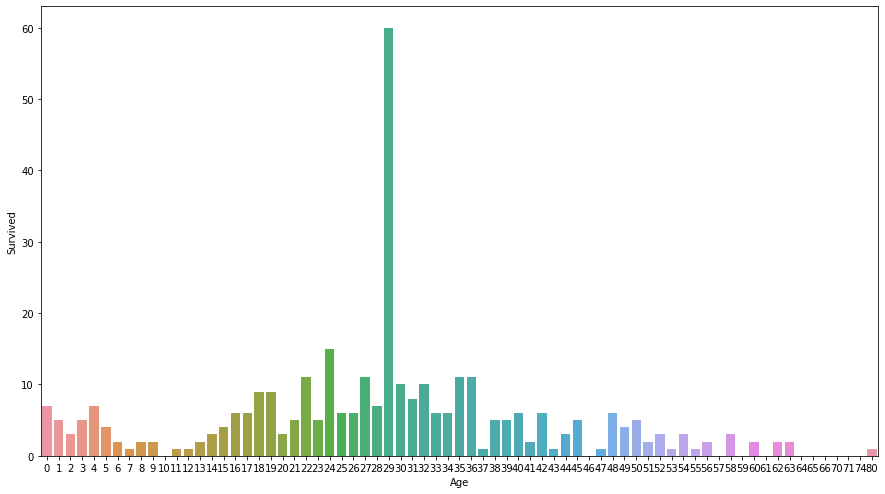

In [13]:
grafico = train.groupby('Age').agg({'Survived':'sum'})
a4_dims = (15, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x=grafico.index,y=grafico['Survived']);


People between 22 and 36 are most likely to survive

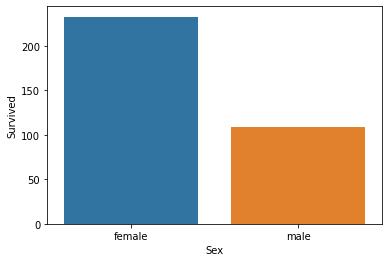

In [14]:
grafico = train.groupby('Sex').agg({'Survived':'sum'})
sns.barplot(x=grafico.index,y=grafico['Survived']);

The number of females that survived are twice as much as men.

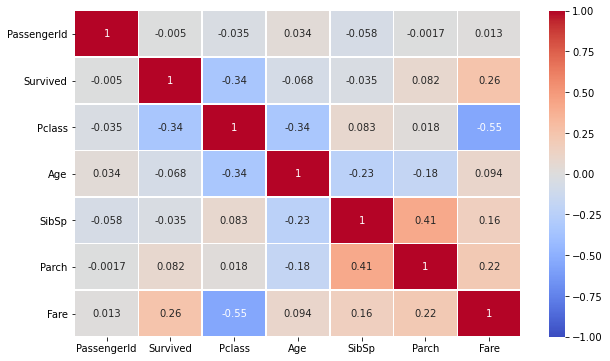

In [15]:
corr = train.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, linewidths=0.5, vmin=-1, vmax=1, cmap='coolwarm',annot=True);

There is an interesting but not very strong correlation between Survived and Fare,Survived and parch and Survived and Pclass.

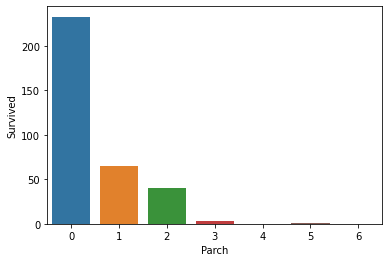

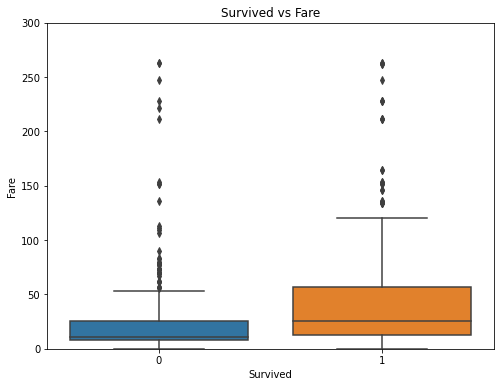

In [16]:
grafico = train.groupby('Parch').agg({'Survived':'sum'})
sns.barplot(grafico.index,grafico['Survived']);

fig, ax=plt.subplots(1,figsize=(8,6))
sns.boxplot(x='Survived',y='Fare', data=train);
ax.set_ylim(0,300)
plt.title("Survived vs Fare");

In [17]:
train.drop(['Name','PassengerId','Cabin','Ticket'],inplace = True,axis = 1)
test.drop(['PassengerId','Name','Ticket','Cabin'],inplace = True,axis = 1)

In [18]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder() 
train['Sex'] = label_encoder.fit_transform(train['Sex'])
test['Sex'] = label_encoder.fit_transform(test['Sex'])


train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,S
1,1,1,0,38,1,0,71.2833,C
2,1,3,0,26,0,0,7.9250,S
3,1,1,0,35,1,0,53.1000,S
4,0,3,1,35,0,0,8.0500,S


In [19]:
train = train.join(pd.get_dummies(train[["Embarked"]]))
train.drop('Embarked',axis = 1,inplace = True)
test = test.join(pd.get_dummies(test[["Embarked"]]))
test.drop('Embarked',axis = 1,inplace = True)
train.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22,1,0,7.2500,0,0,1
1,1,1,0,38,1,0,71.2833,1,0,0
2,1,3,0,26,0,0,7.9250,0,0,1
3,1,1,0,35,1,0,53.1000,0,0,1
4,0,3,1,35,0,0,8.0500,0,0,1


In [20]:
train['Bajo'] = 0
train['Medio'] = 0
train['Medio-Alto'] = 0
train['Alto'] = 0
train.loc[ train['Fare'] <= 7.91, 'Bajo'] = 1
train.loc[(train['Fare'] > 7.91) & (train['Fare'] <= 14.454), 'Medio'] = 1
train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 31), 'Medio-Alto']   = 1
train.loc[ train['Fare'] > 31, 'Alto'] = 1

test['Bajo'] = 0
test['Medio'] = 0
test['Medio-Alto'] = 0
test['Alto'] = 0
test.loc[ test['Fare'] <= 7.91, 'Bajo'] = 1
test.loc[(test['Fare'] > 7.91) & (test['Fare'] <= 14.454), 'Medio'] = 1
test.loc[(test['Fare'] > 14.454) & (test['Fare'] <= 31), 'Medio-Alto']   = 1
test.loc[ test['Fare'] > 31, 'Alto'] = 1
test.drop('Fare',axis = 1,inplace = True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Bajo,Medio,Medio-Alto,Alto
0,0,3,1,22,1,0,7.2500,0,0,1,1,0,0,0
1,1,1,0,38,1,0,71.2833,1,0,0,0,0,0,1
2,1,3,0,26,0,0,7.9250,0,0,1,0,1,0,0
3,1,1,0,35,1,0,53.1000,0,0,1,0,0,0,1
4,0,3,1,35,0,0,8.0500,0,0,1,0,1,0,0


In [21]:
train.drop('Fare',axis = 1,inplace = True)

In [22]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train['IsAlone'] = 0
train.loc[train['FamilySize'] == 1, 'IsAlone'] = 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
test['IsAlone'] = 0
test.loc[test['FamilySize'] == 1, 'IsAlone'] = 1
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Bajo,Medio,Medio-Alto,Alto,FamilySize,IsAlone
0,0,3,1,22,1,0,0,0,1,1,0,0,0,2,0
1,1,1,0,38,1,0,1,0,0,0,0,0,1,2,0
2,1,3,0,26,0,0,0,0,1,0,1,0,0,1,1
3,1,1,0,35,1,0,0,0,1,0,0,0,1,2,0
4,0,3,1,35,0,0,0,0,1,0,1,0,0,1,1


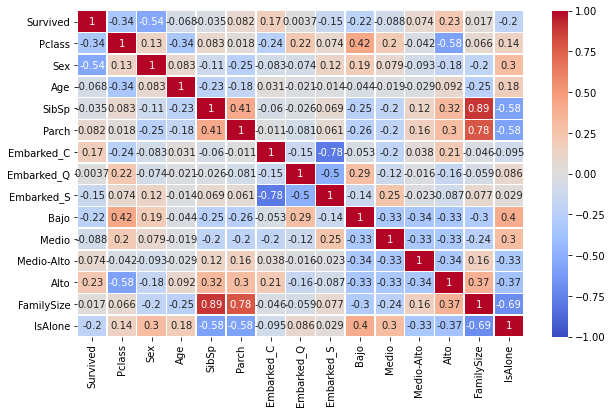

In [23]:
corr = train.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, linewidths=0.5, vmin=-1, vmax=1, cmap='coolwarm',annot=True);

In [24]:
X = train.drop(['Survived'], axis=1)
y = train['Survived']

In [25]:
from sklearn.model_selection import train_test_split

#Splitting Train_data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .25 ,random_state = 0)

Start model selection

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"],'max_iter' :[150,200]}# l1 lasso l2 ridge
lr=LogisticRegression()
lr=GridSearchCV(lr,grid,cv=10)
lr.fit(X_train,y_train)
acc_logistic = lr.score(X_test,y_test)
acc_logistic

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_se

0.7937219730941704

In [27]:
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
rfc1=RandomForestClassifier(max_features='sqrt', n_estimators= 500, max_depth=7, criterion='entropy')
rfc1.fit(X_train,y_train)
acc_randomF = rfc1.score(X_test,y_test)
acc_randomF


0.8385650224215246

In [28]:
from sklearn.tree import DecisionTreeClassifier
depths = np.arange(1, 21)
num_leafs = [1, 5, 10, 20, 50, 100]
parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
clf=DecisionTreeClassifier()
clf_GV= GridSearchCV(clf,parameters)
clf_GV.fit(X_train,y_train)
acc_decision = clf_GV.score(X_test,y_test)
acc_decision

0.820627802690583

In [29]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
acc_gaussian = gaussian.score(X_test,y_test)
acc_gaussian

0.7668161434977578

In [30]:
from sklearn.svm import SVC

svc = SVC()
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]
svc = GridSearchCV(svc, tuned_parameters)
svc.fit(X_train, y_train)
acc_svm = svc.score(X_test,y_test)
acc_svm

0.8161434977578476

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
parameters = {
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse","mae"]
    }

gbk = GridSearchCV(GradientBoostingClassifier(), parameters, cv=10, n_jobs=-1)
gbk.fit(X_train, y_train)
acc_gradientBoost = gbk.score(X_test,y_test)
acc_gradientBoost

0.8071748878923767

In [32]:
model_comp = pd.DataFrame({ 'Model': ['Logistic Regression','Decision Tree', 'Random Forest', 'Gaussian Naive Bayes','SVC','GBC'],
                                        'Score': [acc_logistic, acc_decision, acc_randomF, acc_gaussian,acc_svm,acc_gradientBoost]})
model_comp.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,0.838565
1,Decision Tree,0.820628
4,SVC,0.816143
5,GBC,0.807175
0,Logistic Regression,0.793722
3,Gaussian Naive Bayes,0.766816


In [33]:
rfc1.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=7, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Bajo,Medio,Medio-Alto,Alto,FamilySize,IsAlone
0,3,1,34,0,0,0,1,0,1,0,0,0,1,1
1,3,0,47,1,0,0,0,1,1,0,0,0,2,0
2,2,1,62,0,0,0,1,0,0,1,0,0,1,1
3,3,1,27,0,0,0,0,1,0,1,0,0,1,1
4,3,0,22,1,1,0,0,1,0,1,0,0,3,0


In [35]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Bajo,Medio,Medio-Alto,Alto,FamilySize,IsAlone
0,3,1,22,1,0,0,0,1,1,0,0,0,2,0
1,1,0,38,1,0,1,0,0,0,0,0,1,2,0
2,3,0,26,0,0,0,0,1,0,1,0,0,1,1
3,1,0,35,1,0,0,0,1,0,0,0,1,2,0
4,3,1,35,0,0,0,0,1,0,1,0,0,1,1


In [36]:
prediccion = rfc1.predict(test)

In [37]:
Id = pd.read_csv('/kaggle/input/titanic/test.csv')
Id = Id['PassengerId']

In [38]:
ans = pd.DataFrame(prediccion,Id)
ans = ans.reset_index()
ans.columns = ['PassengerId','Survived']
ans

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [39]:
ans.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
